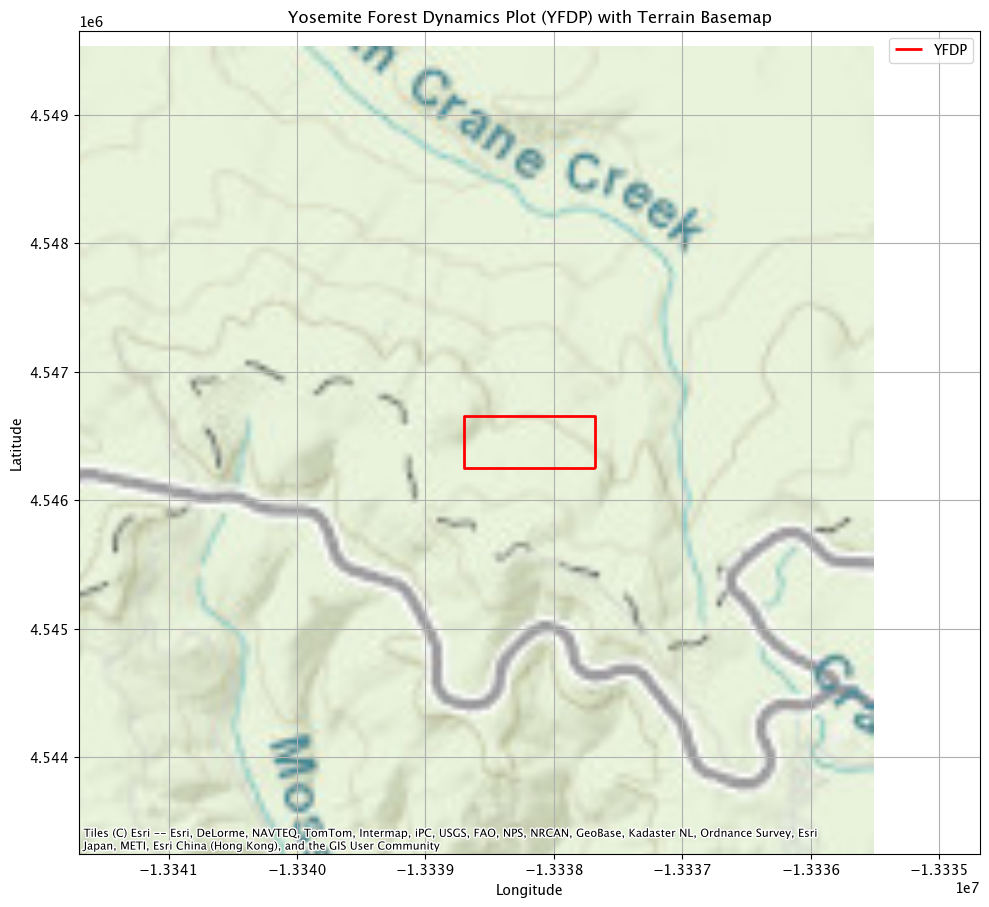

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx

# 1. Define YFDP bounding box in lat/lon (EPSG:4326)
yfdp_bbox = {
    "lat_min": 37.76476,
    "lat_max": 37.76764,
    "lon_min": -119.82355,
    "lon_max": -119.81445
}

# Create a bounding box polygon
bbox = box(
    yfdp_bbox["lon_min"], yfdp_bbox["lat_min"],
    yfdp_bbox["lon_max"], yfdp_bbox["lat_max"]
)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")

# 2. Reproject to Web Mercator (EPSG:3857) for tile-based basemap
gdf_web = gdf.to_crs(epsg=3857)

# 3. Compute expanded bounds to zoom out a bit
xmin, ymin, xmax, ymax = gdf_web.total_bounds
buffer = 3000  # meters to zoom out
xlim = (xmin - buffer, xmax + buffer)
ylim = (ymin - buffer, ymax + buffer)

# 4. Plot with contextily basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot bounding box
gdf_web.boundary.plot(ax=ax, edgecolor="red", linewidth=2, label="YFDP")

# Add terrain basemap (auto-scaled, or manually set zoom)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldTopoMap, zoom=12)

# Set zoomed-out bounds
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Format plot
ax.set_title("Yosemite Forest Dynamics Plot (YFDP) with Terrain Basemap")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
